## ***LABORATORY 5*** - ANEESH KRISHNA RAMESH - 8914620 
---

#### ***Standard Imports***

In [29]:
# import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from tabulate import tabulate
from sklearn.metrics import make_scorer, mean_absolute_error,mean_absolute_percentage_error

#### ***Loading Dataset. Splitting Test & train set***

In [2]:
diabetesX, diabetesy = datasets.load_diabetes(as_frame=True, scaled=False, return_X_y=True)

In [3]:
# Splitting train and test 
X_train, X_test, y_train, y_test = train_test_split(diabetesX, diabetesy, test_size=0.25, random_state=42)

In [7]:
degrees = []
r2Scores = []
maeScores = []
mapeScores = []

#### ***Cross Validation - Mape, MAE, R2***

In [8]:
for degree in range(9):
    featuresPoly = PolynomialFeatures(degree=degree)
    polyX = featuresPoly.fit_transform(X_train)
    
    model = LinearRegression()
    mae = cross_val_score(model, polyX, y_train, cv=5, scoring=make_scorer(mean_absolute_error))
    r2 = cross_val_score(model, polyX, y_train, cv=5, scoring='r2')
    mape = cross_val_score(model, polyX, y_train, cv=5, scoring=make_scorer(mean_absolute_percentage_error))

    degrees.append(degree)
    r2Scores.append(np.mean(r2))
    maeScores.append(np.mean(mae))
    mapeScores.append(np.mean(mape))


#### ***Table for MAE, MAPE, R2 Scores***

In [11]:
table = []
table.append(['degree', 'r-squared', 'MAE','MAPE'])
for degree, r2, mae, mape in zip(degrees, r2Scores, maeScores,mapeScores):
    table.append([degree, r2, mae, mape])

# Calculating mean and standard deviation
r2Mean = np.mean(r2Scores)
r2Sdeviation = np.std(r2Scores)

maeMean = np.mean(maeScores)
maeSdeviation = np.std(maeScores)

mapeMean = np.mean(mape)
mapeSdeviation = np.std(mapeScores)

table.append(['Mean', r2Mean, maeMean,mapeMean])
table.append(['Standard Deviation', r2Sdeviation, maeSdeviation,mapeSdeviation])

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒════════════════════╤═══════════════╤═══════════╤═══════════╕
│ degree             │     r-squared │       MAE │      MAPE │
╞════════════════════╪═══════════════╪═══════════╪═══════════╡
│ 0                  │    -0.0352599 │   66.5828 │  0.631855 │
├────────────────────┼───────────────┼───────────┼───────────┤
│ 1                  │     0.449351  │   45.5942 │  0.407453 │
├────────────────────┼───────────────┼───────────┼───────────┤
│ 2                  │    -0.108459  │   58.7059 │  0.494819 │
├────────────────────┼───────────────┼───────────┼───────────┤
│ 3                  │ -5466.39      │ 1963.74   │ 14.557    │
├────────────────────┼───────────────┼───────────┼───────────┤
│ 4                  │  -104.243     │  444.932  │  3.52942  │
├────────────────────┼───────────────┼───────────┼───────────┤
│ 5                  │  -453.499     │  558.545  │  4.35892  │
├────────────────────┼───────────────┼───────────┼───────────┤
│ 6                  │  -789.382     │  672.015  │  5.1

1

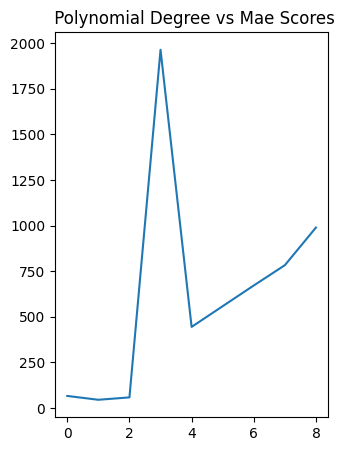

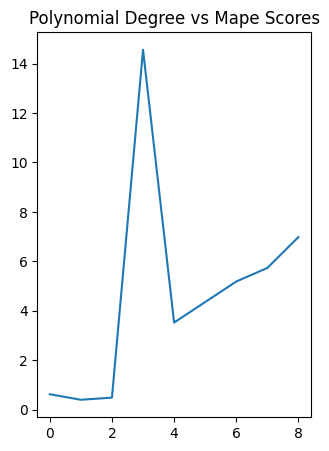

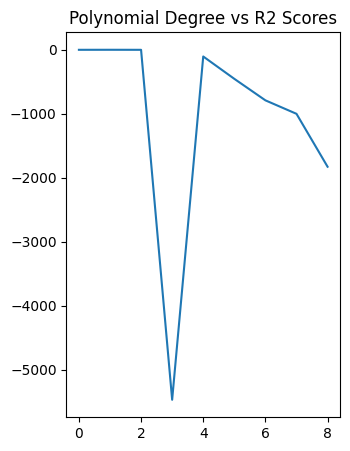

In [31]:
# Since the above data isn't in a dataframe
degrees = list(range(0,9)) 

plt.figure(figsize=(12, 5))
plt.subplot(131)
sb.lineplot(x=degrees, y=maeScores)
plt.title(" Polynomial Degree vs Mae Scores")

plt.figure(figsize=(12, 5))
plt.subplot(132)
sb.lineplot(x=degrees, y=mapeScores)
plt.title("Polynomial Degree vs Mape Scores")

plt.figure(figsize=(12, 5))
plt.subplot(132)
sb.lineplot(x=degrees, y=r2Scores)
plt.title("Polynomial Degree vs R2 Scores")
degrees[np.argmin(maeScores)]


#### ***From the above graph & the table we can see that the r2 Score is positive only for the 1st degree, which is  0.449351 or approximately 0.45. while the lowest being at degree 3. What this means is, taking the avg. of disease progression as a prediction is more accurate than the model.***